In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [4]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Mexico ['availability_365'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26582 non-null  int64
dtypes: int64(1)
memory usage: 207.8 KB


In [16]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico ['availability_365'].max()
Min = Mexico ['availability_365'].min()
Limites = [Min, Max]
Limites

[0, 365]

In [17]:
# Calculamos el rango R
R = Max - Min
R

365

In [18]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [19]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

23.263772090193346

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [20]:
# Categorización de variables
intervalos = np.linspace (0, 365, 16)
intervalos

array([  0.        ,  24.33333333,  48.66666667,  73.        ,
        97.33333333, 121.66666667, 146.        , 170.33333333,
       194.66666667, 219.        , 243.33333333, 267.66666667,
       292.        , 316.33333333, 340.66666667, 365.        ])

In [21]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [22]:
# Creamos las ctegorias en la columna numerica
Mexico ['availability_365'] = pd.cut ( x = Mexico  ['availability_365'], bins = intervalos, labels = categorias )
Mexico ['availability_365']

0        Categoria15
1        Categoria14
2        Categoria14
3        Categoria11
4        Categoria12
            ...     
26577    Categoria15
26578     Categoria8
26579     Categoria8
26580     Categoria8
26581     Categoria7
Name: availability_365, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [23]:
table1 = freq_tbl(Mexico ['availability_365'])
table1

availability_365  frequency  percentage  cumulative_perc
0       Categoria15       6605    0.248476         0.272686
1       Categoria14       2815    0.105899         0.388903
2       Categoria11       1977    0.074374         0.470523
3        Categoria4       1692    0.063652         0.540377
4       Categoria12       1570    0.059063         0.605194
5       Categoria13       1436    0.054022         0.664479
6        Categoria3       1236    0.046498         0.715507
7        Categoria7       1122    0.042209         0.761828
8        Categoria8       1089    0.040968         0.806787
9       Categoria10       1052    0.039576         0.850219
10       Categoria6        883    0.033218         0.886673
11       Categoria1        769    0.028929         0.918421
12       Categoria2        706    0.026559         0.947568
13       Categoria9        636    0.023926         0.973825
14       Categoria5        634    0.023851         1.000000

In [24]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

availability_365  frequency
0       Categoria15       6605
1       Categoria14       2815
2       Categoria11       1977
3        Categoria4       1692
4       Categoria12       1570
5       Categoria13       1436
6        Categoria3       1236
7        Categoria7       1122
8        Categoria8       1089
9       Categoria10       1052
10       Categoria6        883
11       Categoria1        769
12       Categoria2        706
13       Categoria9        636
14       Categoria5        634

In [25]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('availability_365')
Filtro_index

frequency
availability_365           
Categoria15            6605
Categoria14            2815
Categoria11            1977
Categoria4             1692
Categoria12            1570
Categoria13            1436
Categoria3             1236
Categoria7             1122
Categoria8             1089
Categoria10            1052
Categoria6              883
Categoria1              769
Categoria2              706
Categoria9              636
Categoria5              634

Text(0, 0.5, 'Frecuencia')

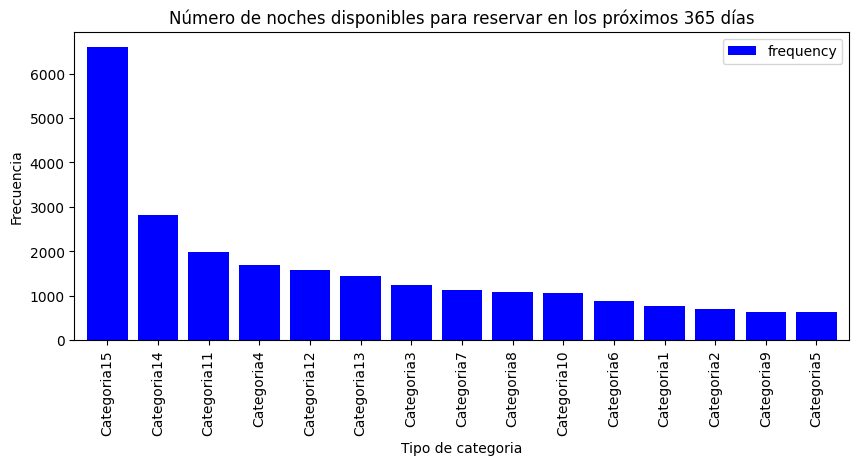

In [26]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches disponibles para reservar en los próximos 365 días')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')